# Simple linear regression - Exercise Solution

You are given a real estate dataset. 

Real estate is one of those examples that every regression course goes through as it is extremely easy to understand and there is a (almost always) certain causal relationship to be found.

The data is located in the file: 'real_estate_price_size.csv'. 

You are expected to create a simple linear regression (similar to the one in the lecture), using the new data. 

Apart from that, please:
-  Create a scatter plot (with or without a regression line)
-  Calculate the R-squared
-  Display the intercept and coefficient(s)
-  Using the model make a prediction about an apartment with size 750 sq.ft.

Note: In this exercise, the dependent variable is 'price', while the independent variable is 'size'.

Good luck!

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

## Load the data

In [2]:
data = pd.read_csv('real_estate_price_size.csv')
data.head()

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46


In [3]:
data.describe()

,price,size
count,100.000000,100.000000
mean,292289.470160,853.024200
std,77051.727525,297.941951
min,154282.128000,479.750000
25%,234280.148000,643.330000
50%,280590.716000,696.405000
75%,335723.696000,1029.322500
max,500681.128000,1842.510000


## Create the regression

### Declare the dependent and the independent variables

In [4]:
x = data['size'] #independent variable
y = data['price']#dependent variable

### Explore the data

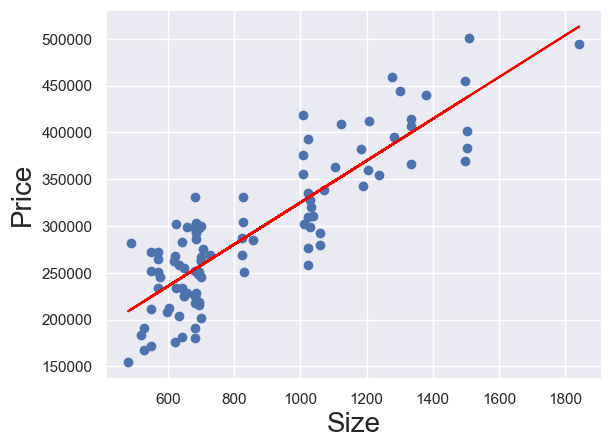

In [6]:
plt.scatter(x,y)
plt.xlabel('Size',fontsize=20)
plt.ylabel('Price',fontsize=20)
# Calculate the line of best fit
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')  # Regression line
plt.show()

### Transform the inputs into a matrix (2D object)

In [7]:
x_matrix = x.values.reshape(-1,1)# reshape the data to 2D array

### Regression itself

In [ ]:
reg = LinearRegression()# create a linear regression object
reg.fit(x_matrix,y)# fit the data to the model | x_matrix: The matrix of features (independent variables). y: The dependent variable

LinearRegression()

### Calculate the R-squared

In [9]:
reg.score(x_matrix,y)# R-squared value to evaluate the model

0.7447391865847587

### Find the intercept

In [10]:
reg.intercept_

101912.60180122912

### Find the coefficients

In [11]:
reg.coef_

array([223.17874259])

This means:

The slope of the regression line is approximately 223.18.

For every unit increase in the independent variable (x), the dependent variable (house price) increases by 223.18 units on average.

For each additional square foot of house size, the price increases by approximately 223.18 dollars.


### Making predictions

You find an apartment online with a size of 2500 sq.ft.

All else equal what should be its price according to the model?

In [19]:
reg.predict(np.array([[2500]]))

array([659859.45828775])

In [18]:
from sklearn.metrics import mean_squared_error


# Predict the values using the regression model
y_pred = reg.predict(x_matrix)

# Calculate the Mean Squared Error
mse = mean_squared_error(y, y_pred)

# Calculate the Root Mean Squared Error
rmse = np.sqrt(mse)
rmse

38733.97357182569

An RMSE (Root Mean Squared Error) value of 38733 indicates the average magnitude of the errors between the predicted values and the actual values in your regression model. Specifically, it means that, on average, the predicted prices deviate from the actual prices by approximately 38,733 units (e.g., dollars if the prices are in dollars).


In general:


A lower RMSE value indicates a better fit of the model to the data.

A higher RMSE value indicates a poorer fit.

However, the interpretation of RMSE also depends on the context of the data:


If the range of the dependent variable (Price) is large, an RMSE of 38733 might be acceptable.